In [2]:
from google.colab import files
uploaded = files.upload()


Saving project.zip to project.zip


In [3]:
import zipfile
import os

zip_path = "/content/project.zip"
extract_path = "/content"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Archivos extraídos correctamente.")


✅ Archivos extraídos correctamente.


In [4]:
import shutil
from sklearn.model_selection import train_test_split

# Rutas
images_path = "content/data1"
labels_path = "content/yolo_labels"

# Crear carpetas destino
for split in ["train", "val"]:
    os.makedirs(f"/content/dataset/images/{split}", exist_ok=True)
    os.makedirs(f"/content/dataset/labels/{split}", exist_ok=True)

# Obtener archivos
images = sorted([f for f in os.listdir(images_path) if f.endswith(".png")])
labels = sorted([f.replace(".png", ".txt") for f in images])

# Crear rutas completas
image_paths = [os.path.join(images_path, img) for img in images]
label_paths = [os.path.join(labels_path, lbl) for lbl in labels]

# Split 80/20
train_imgs, val_imgs, train_lbls, val_lbls = train_test_split(
    image_paths, label_paths, test_size=0.2, random_state=42
)

# Función para copiar a la estructura YOLO
def copy_to_yolo_structure(imgs, lbls, split):
    for img_path, lbl_path in zip(imgs, lbls):
        shutil.copy(img_path, f"/content/dataset/images/{split}/")
        shutil.copy(lbl_path, f"/content/dataset/labels/{split}/")

# Copiar
copy_to_yolo_structure(train_imgs, train_lbls, "train")
copy_to_yolo_structure(val_imgs, val_lbls, "val")


In [5]:
import os

labels_path = '/content/dataset/labels/train'  # cambia si tus etiquetas están en otro sitio

all_classes = set()

# Recorre todos los archivos .txt en la carpeta de etiquetas
for file_name in os.listdir(labels_path):
    if file_name.endswith('.txt'):
        with open(os.path.join(labels_path, file_name), 'r') as f:
            for line in f:
                class_id = int(line.strip().split()[0])  # el primer número es la clase
                all_classes.add(class_id)

# Mostrar resultados
sorted_classes = sorted(list(all_classes))
print(f"✅ Número total de clases: {len(sorted_classes)}")
print(f"🏷️ Clases detectadas: {sorted_classes}")


✅ Número total de clases: 2
🏷️ Clases detectadas: [0, 1]


In [6]:
%%writefile /content/data.yaml
train: /content/dataset/images/train
val: /content/dataset/images/val

nc: 2
names: ['clase0', 'clase1']


Writing /content/data.yaml


In [7]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17360, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 17360 (delta 36), reused 18 (delta 18), pack-reused 17308 (from 2)
Receiving objects: 100% (17360/17360), 16.25 MiB | 15.83 MiB/s, done.
Resolving deltas: 100% (11901/11901), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s e

In [8]:
!python train.py --img 416 --batch 16 --epochs 50 --data /content/data.yaml --weights yolov5s.pt --name gotas_yolo


Se han truncado las últimas 5000 líneas del flujo de salida.
  with torch.cuda.amp.autocast(amp):
      40/49      1.89G   0.003652    0.00371  0.0001682         75        416:  12% 31/250 [00:13<01:27,  2.49it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      40/49      1.89G   0.003641    0.00371  0.0001702         76        416:  13% 32/250 [00:13<01:40,  2.18it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      40/49      1.89G   0.003624   0.003704  0.0001698         81        416:  13% 33/250 [00:14<01:22,  2.62it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.au

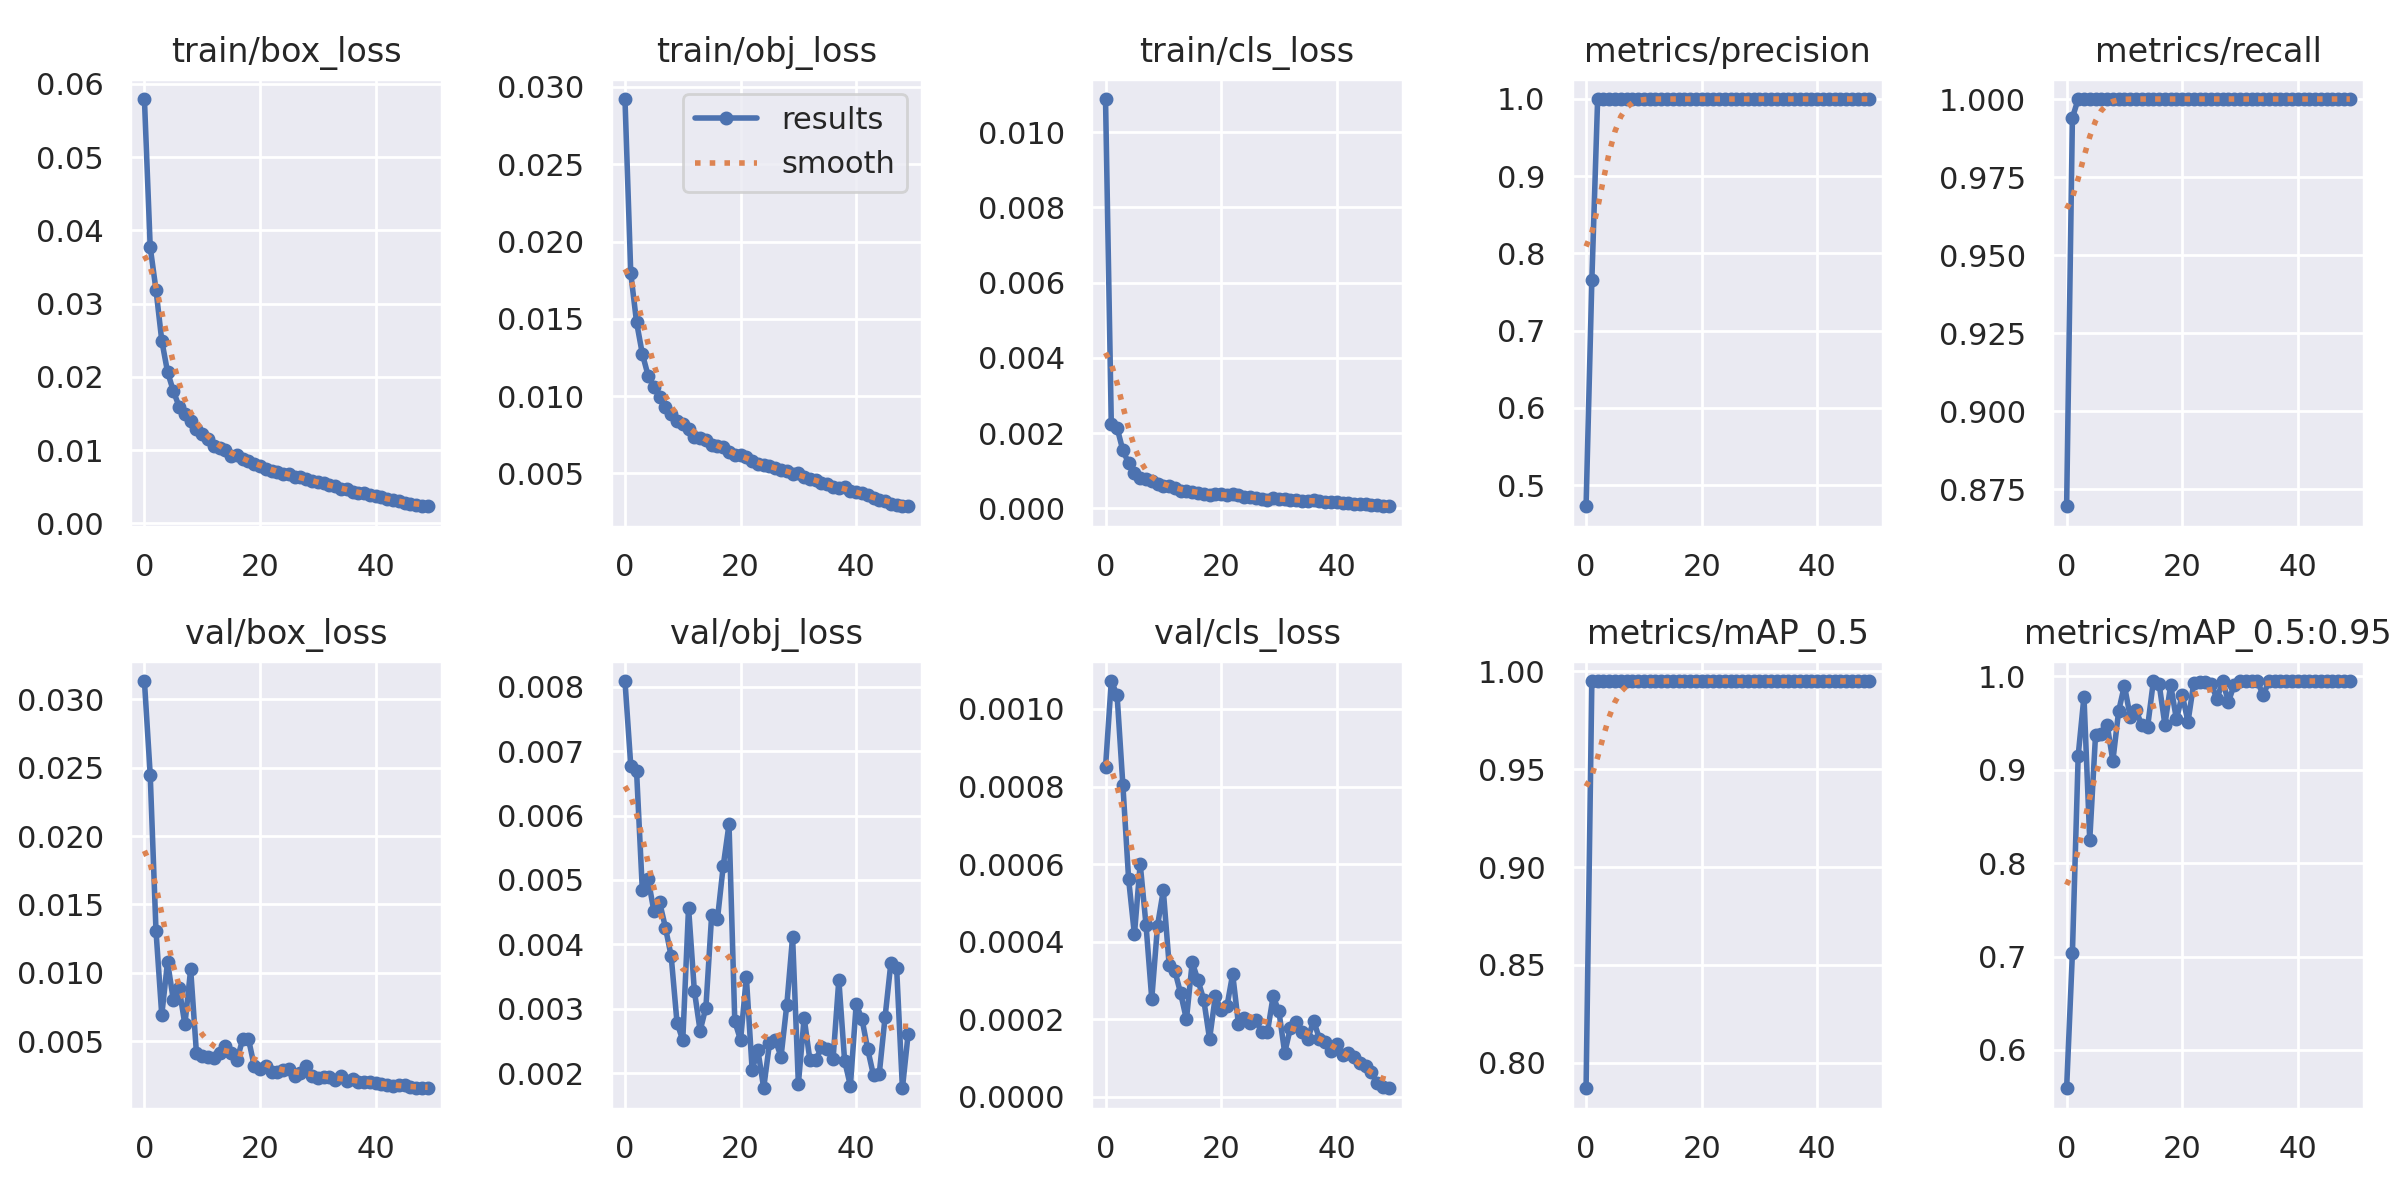

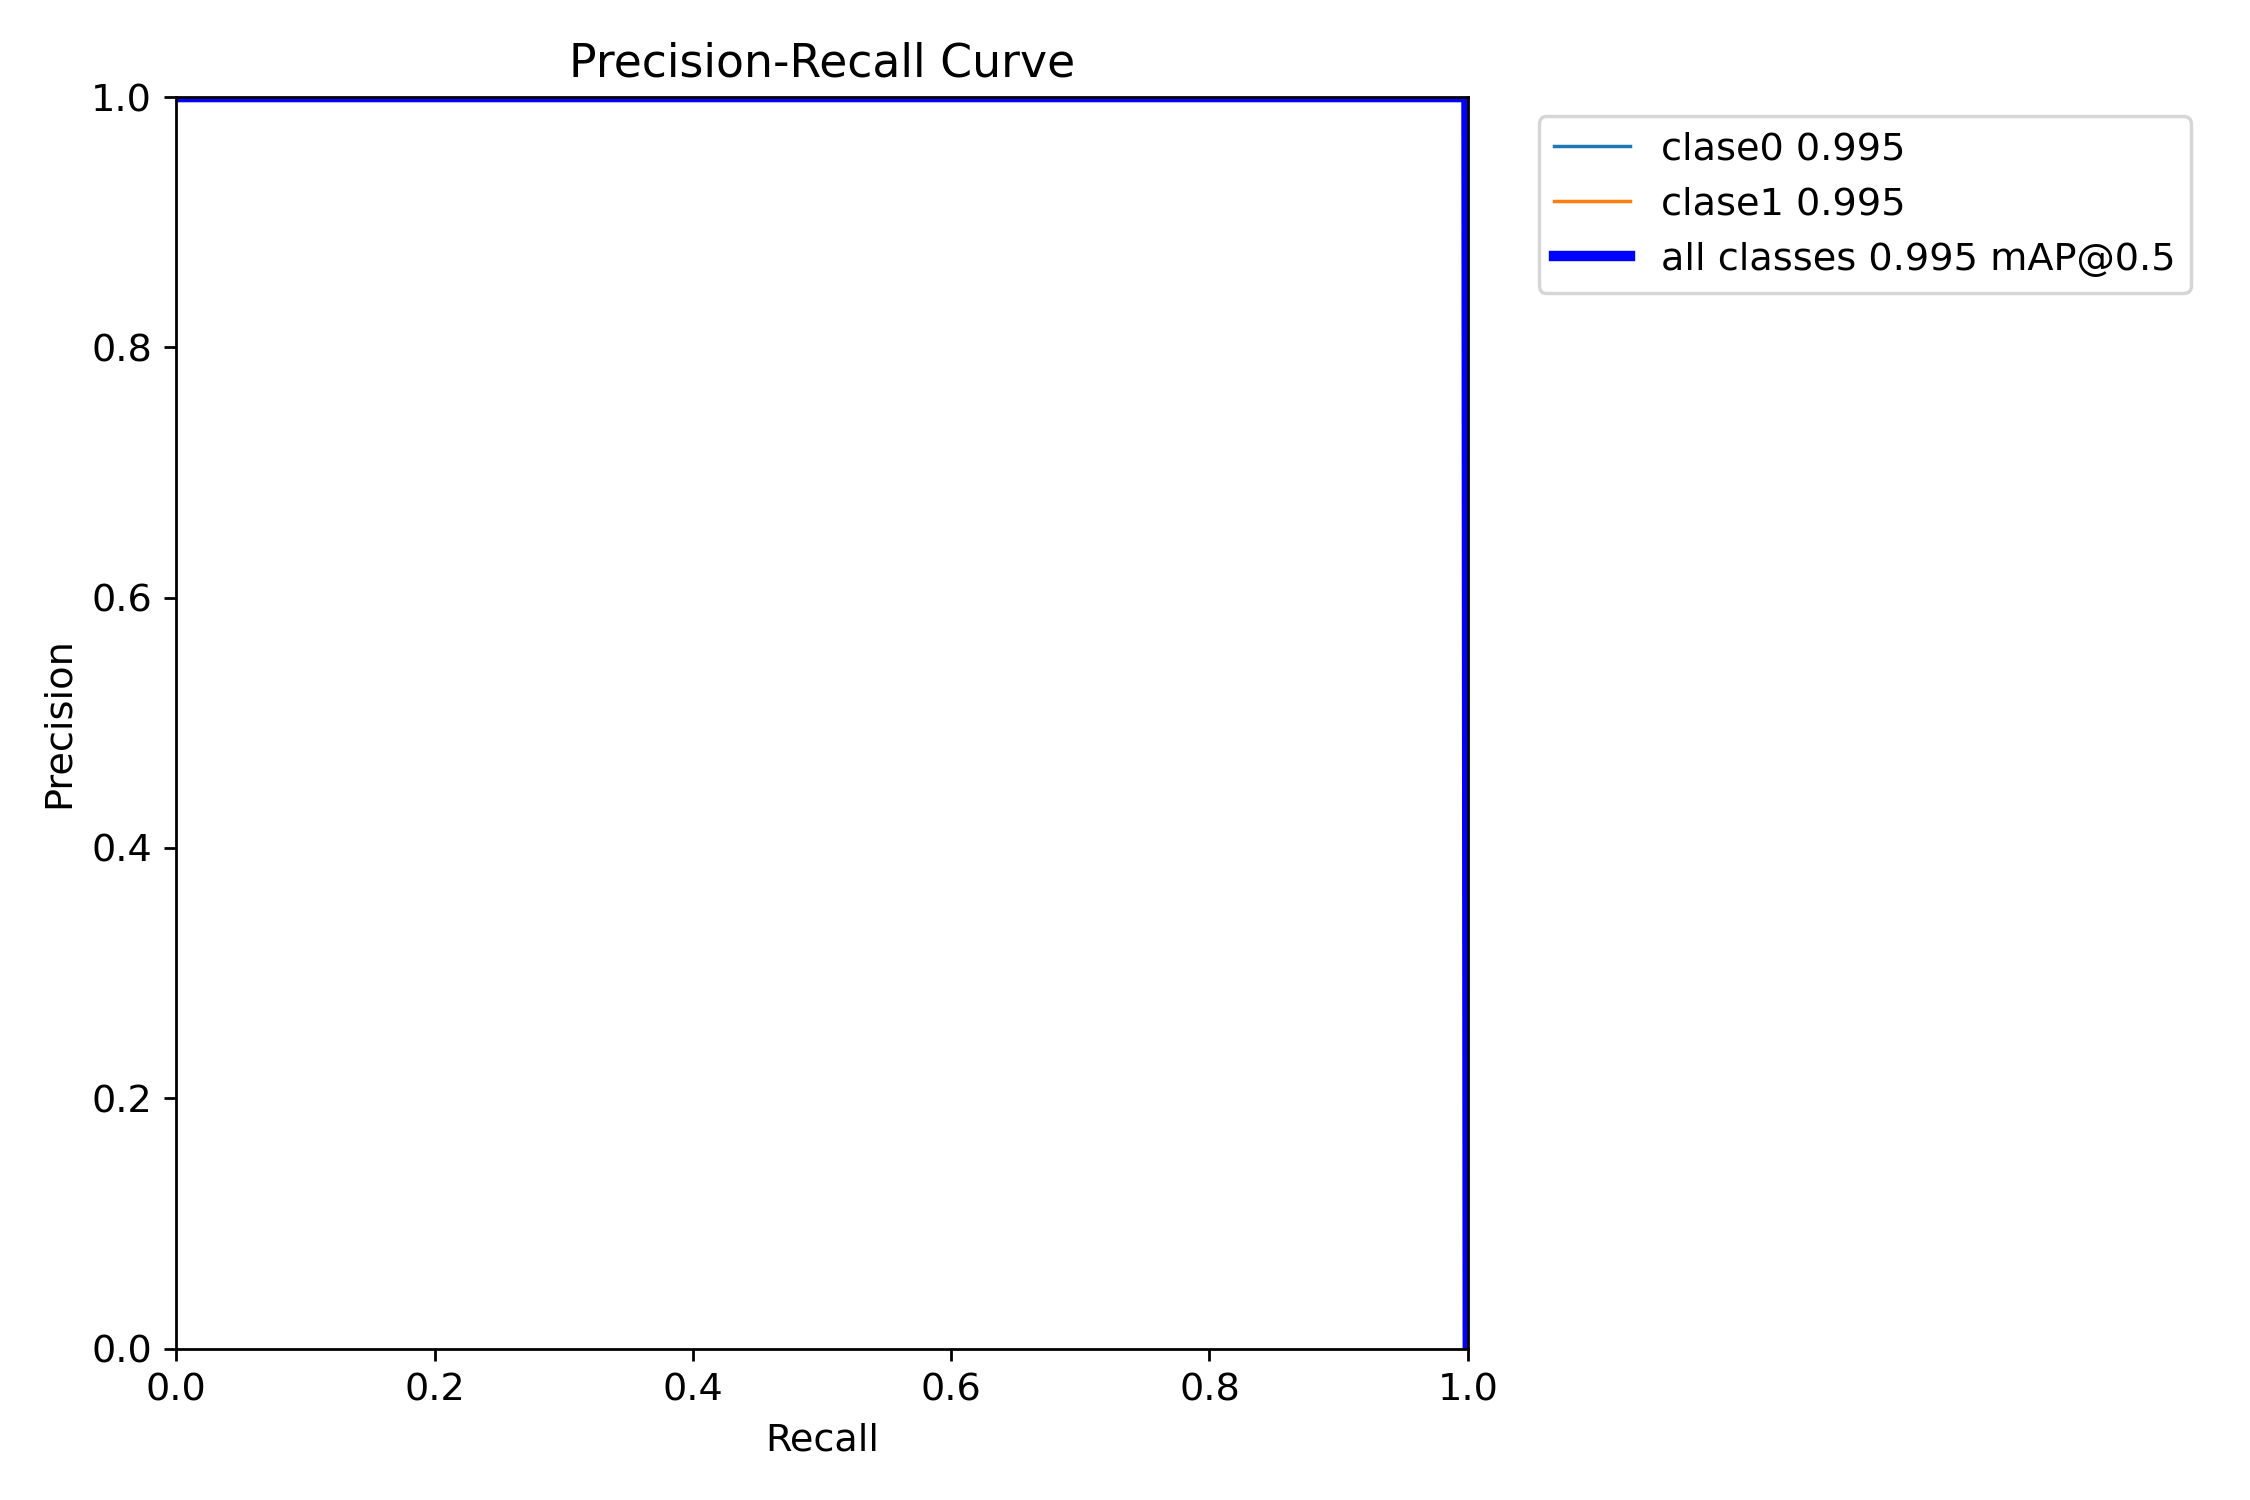

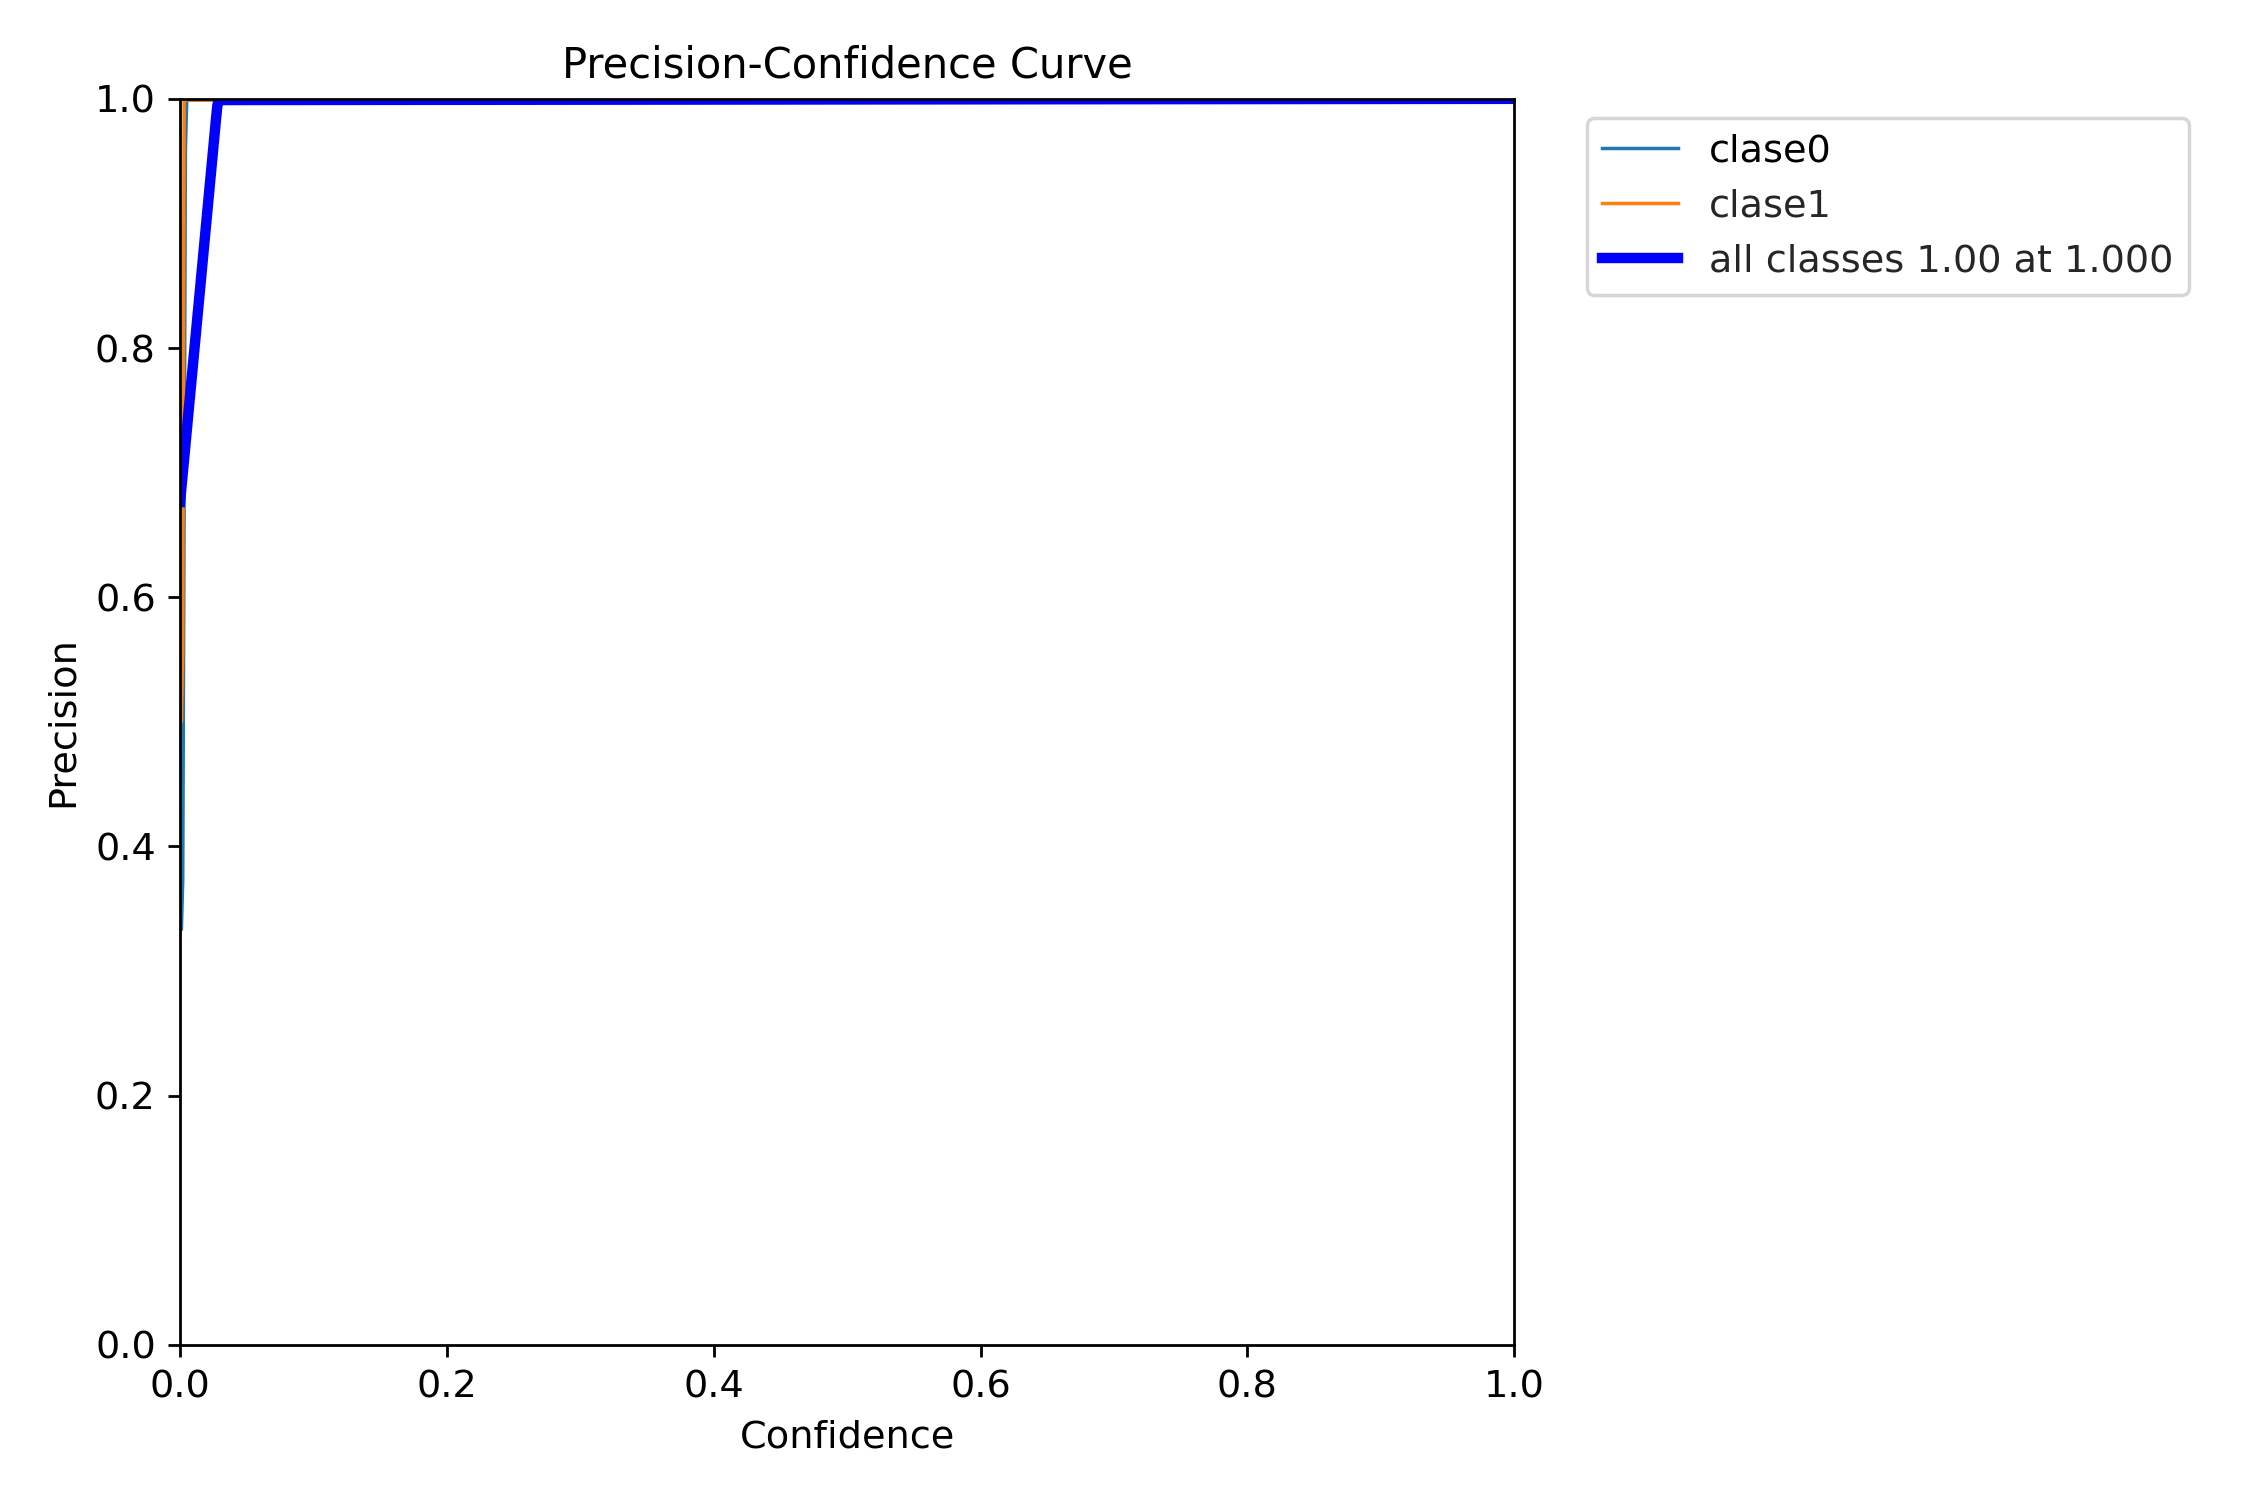

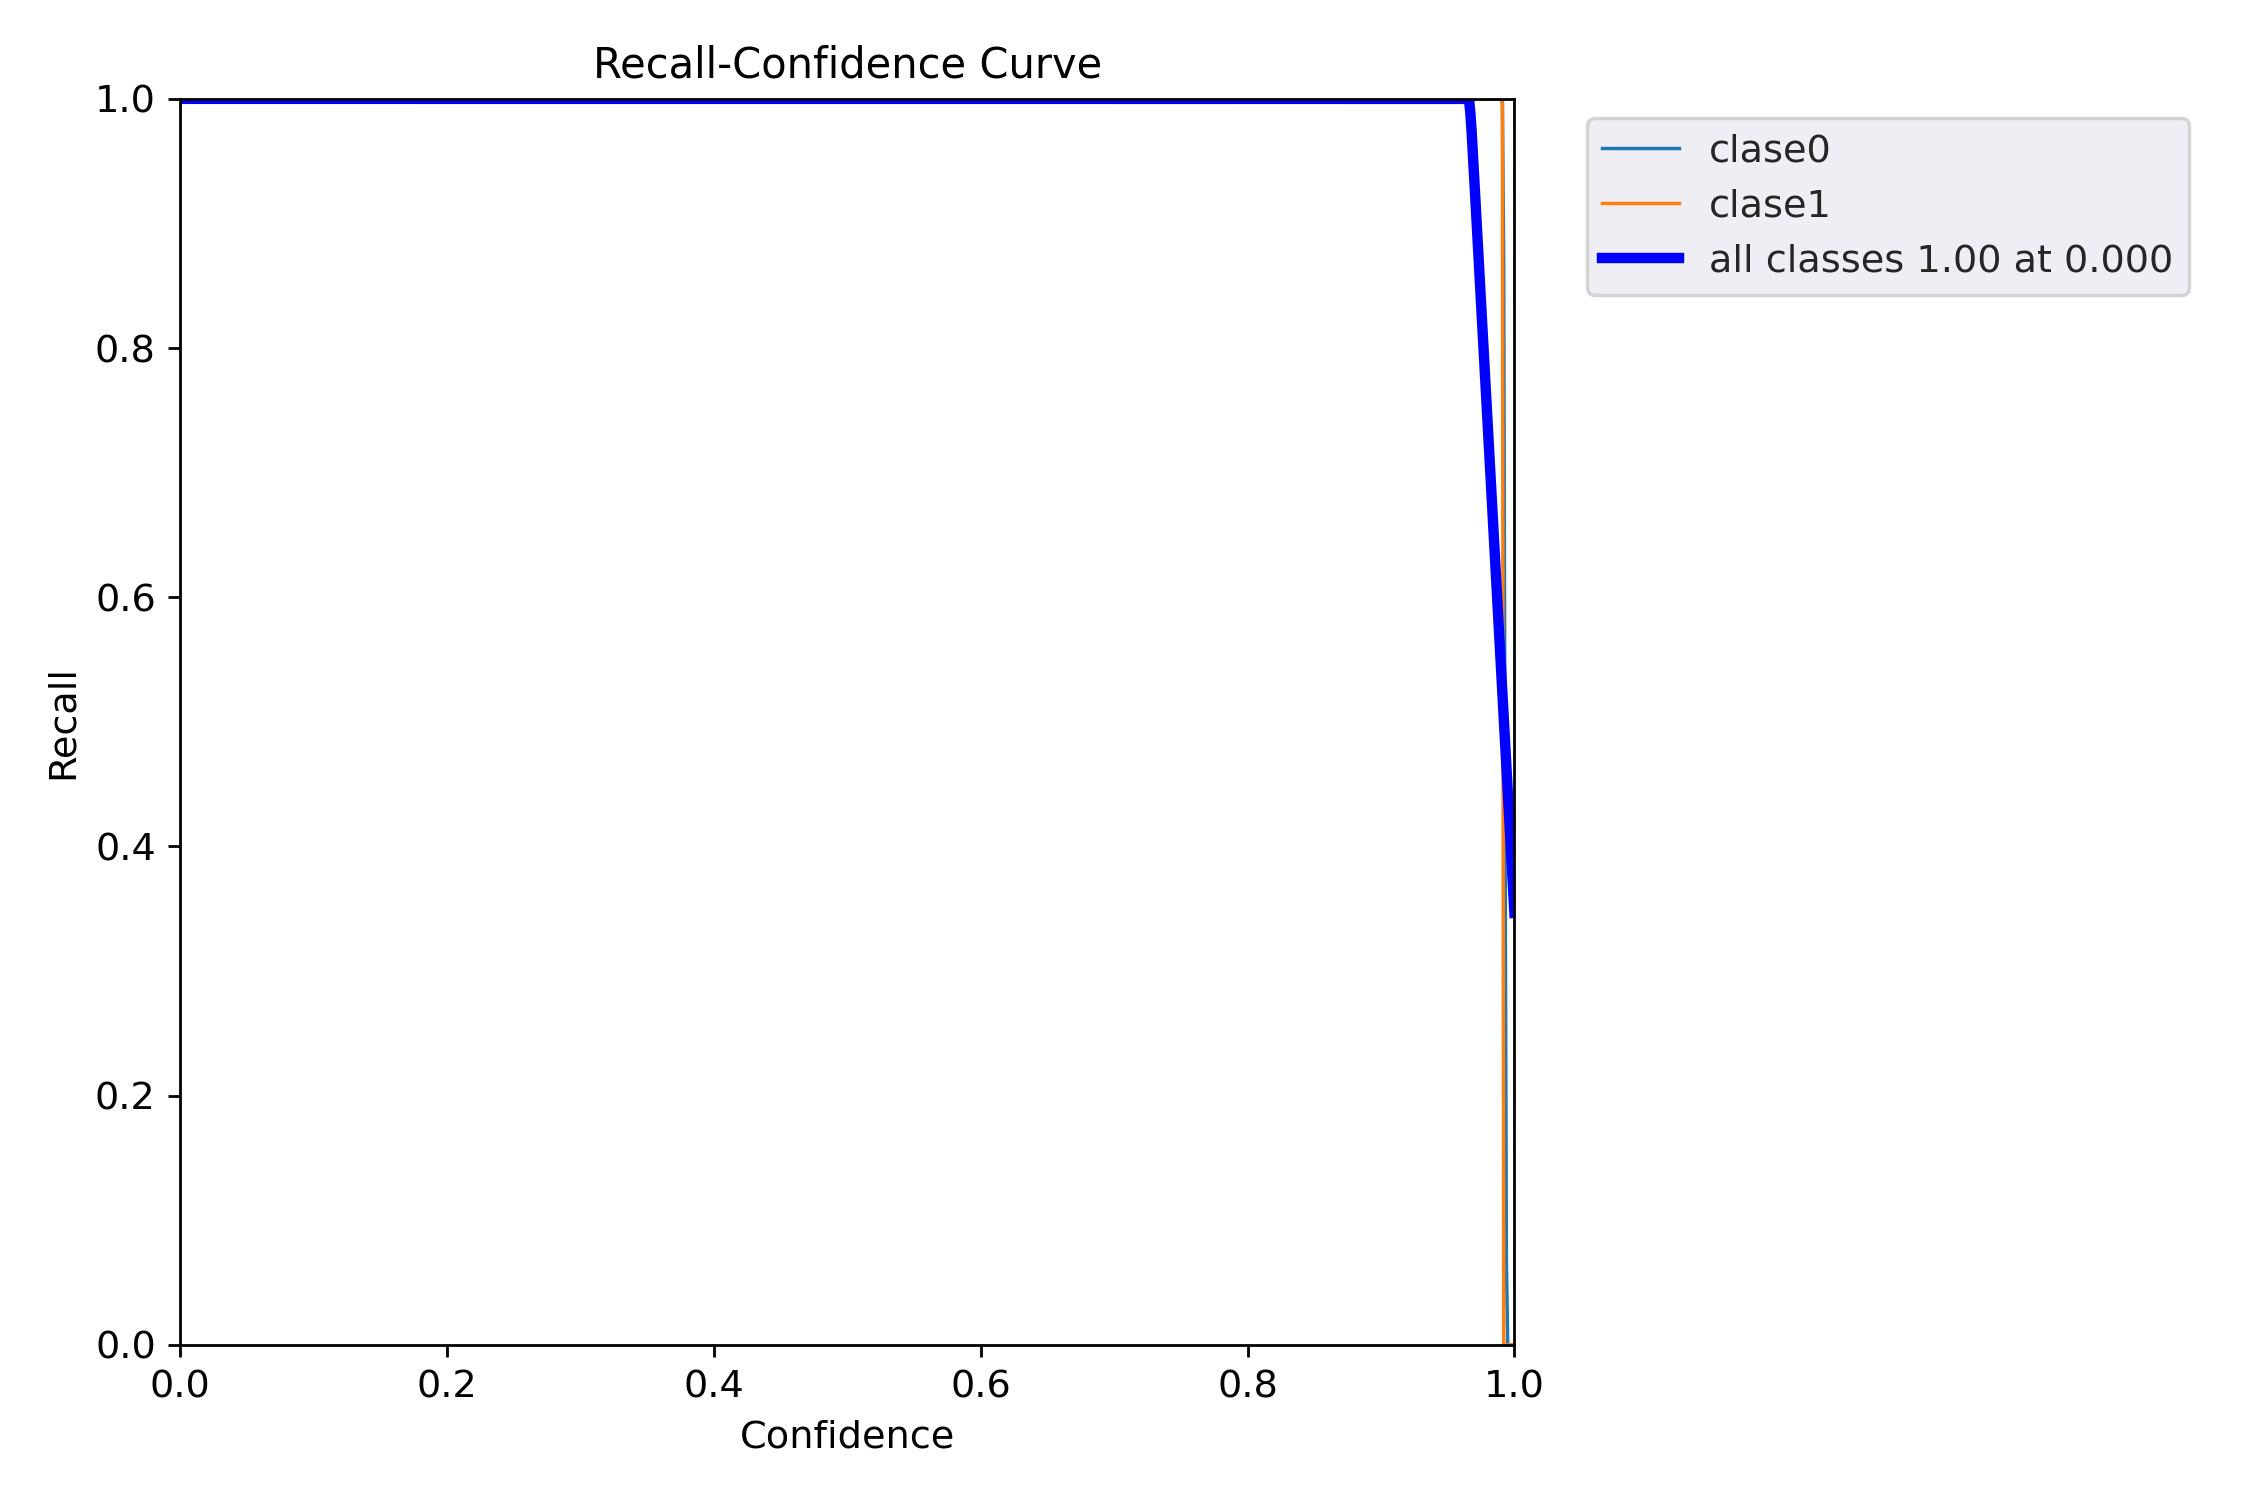

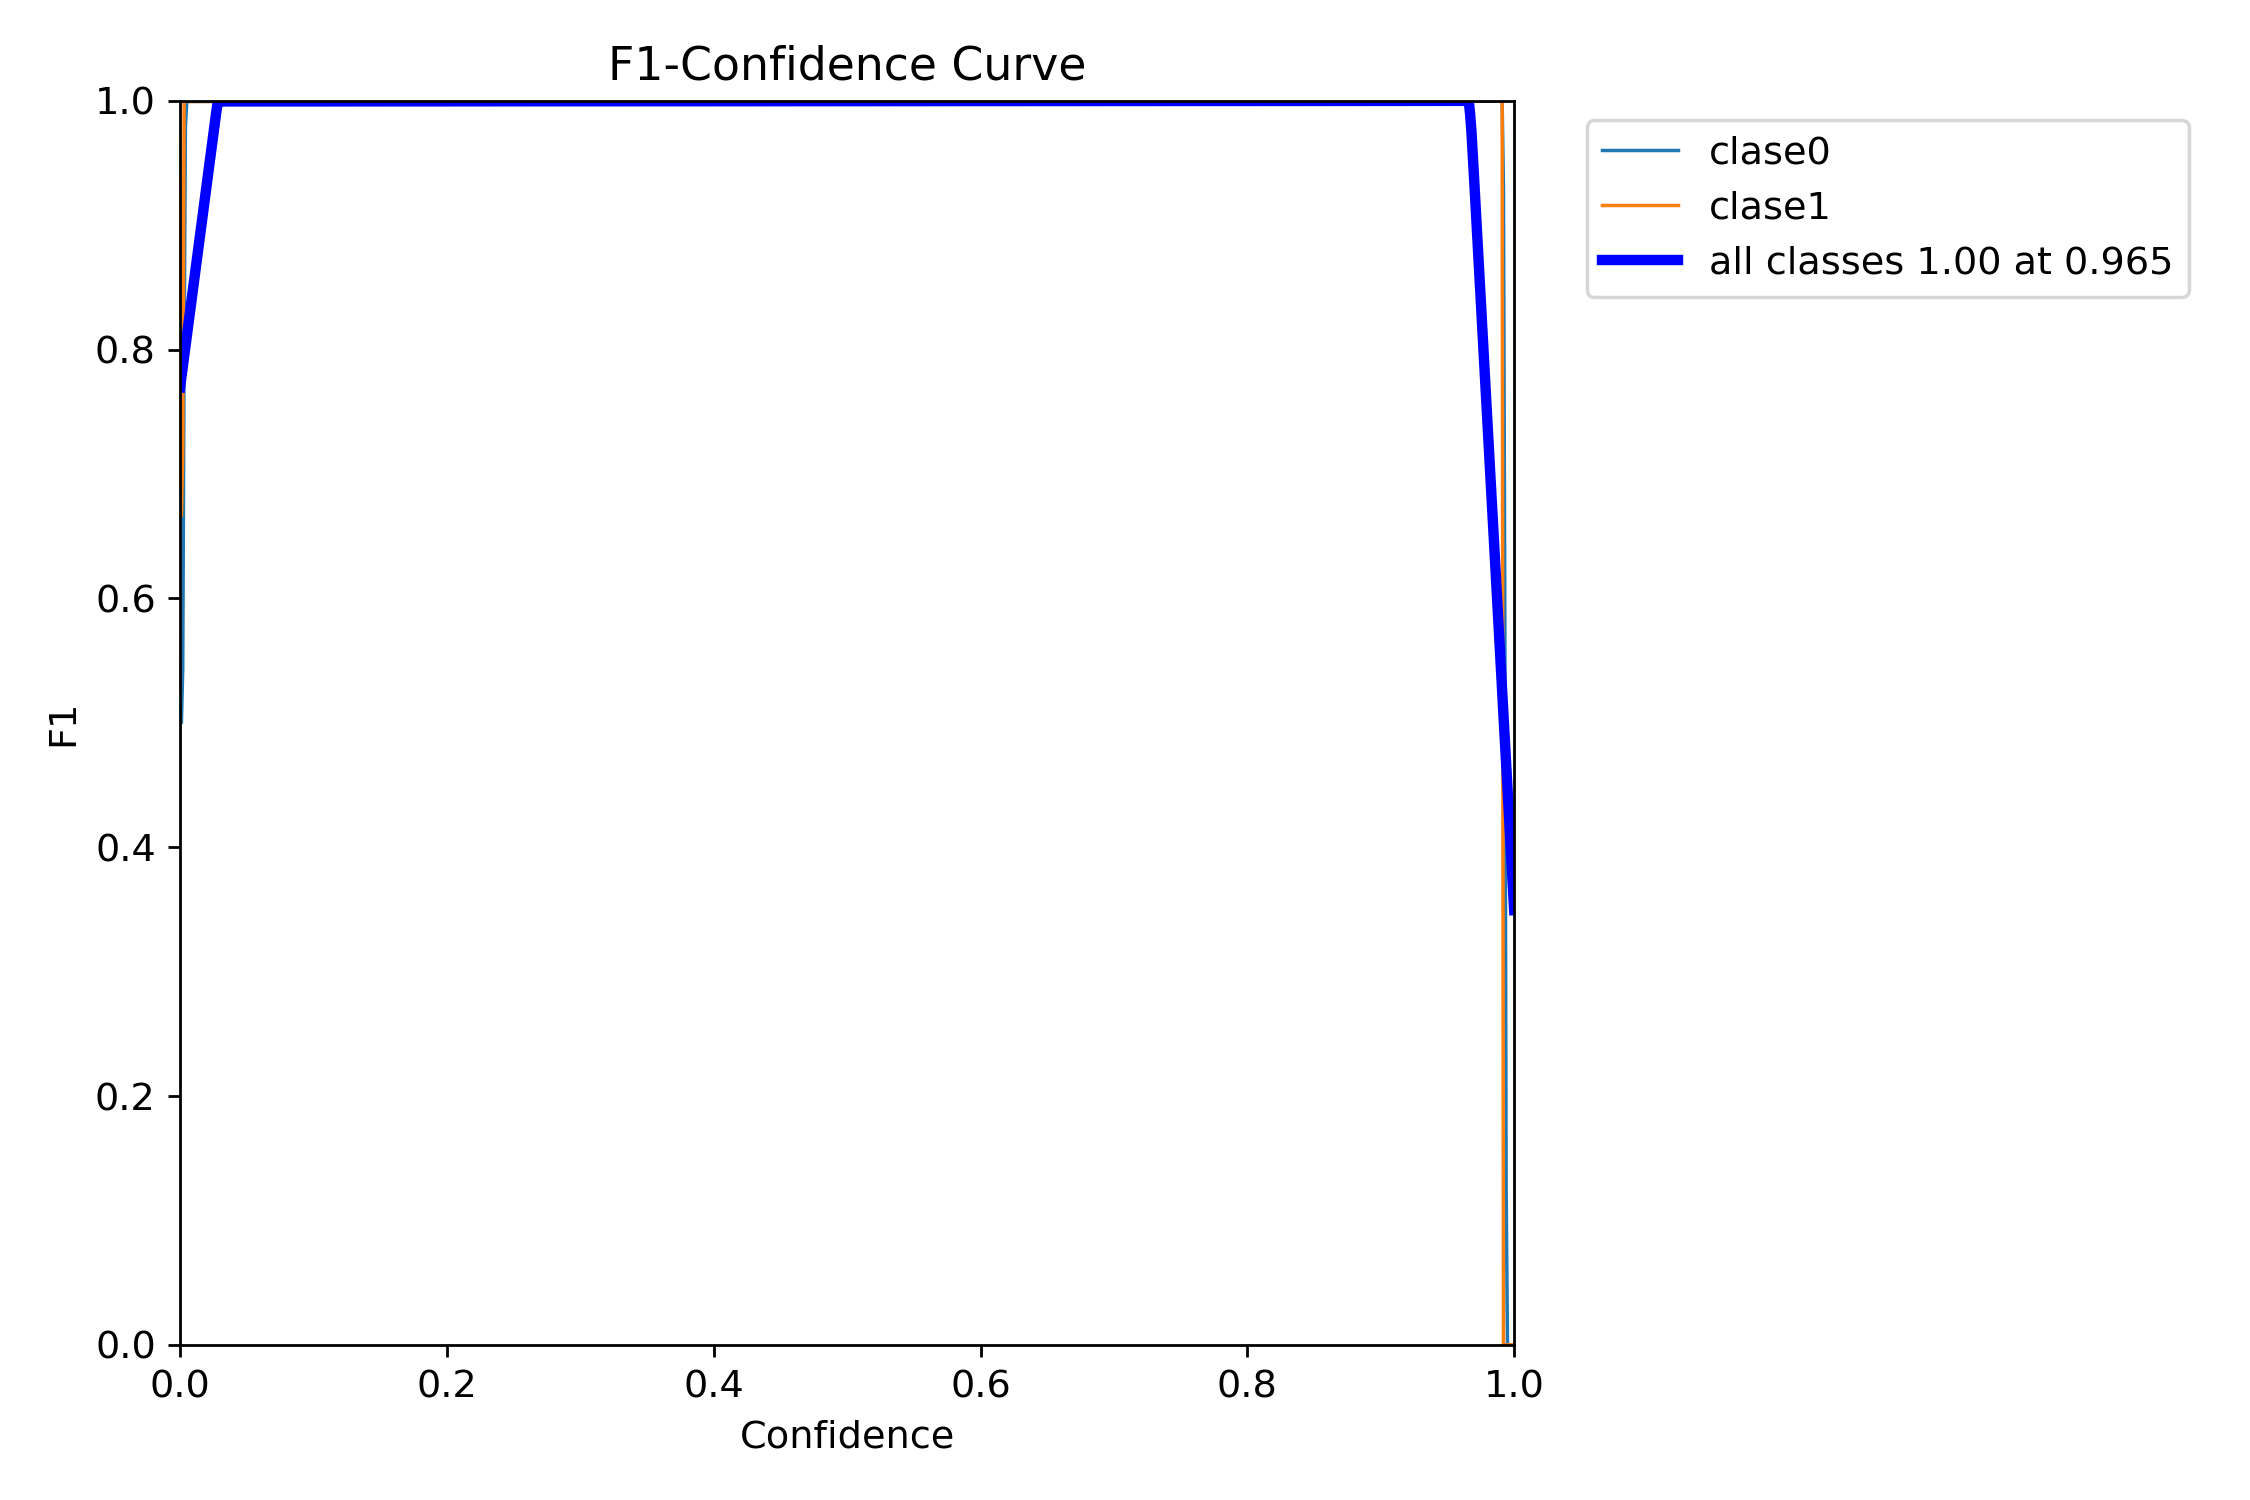

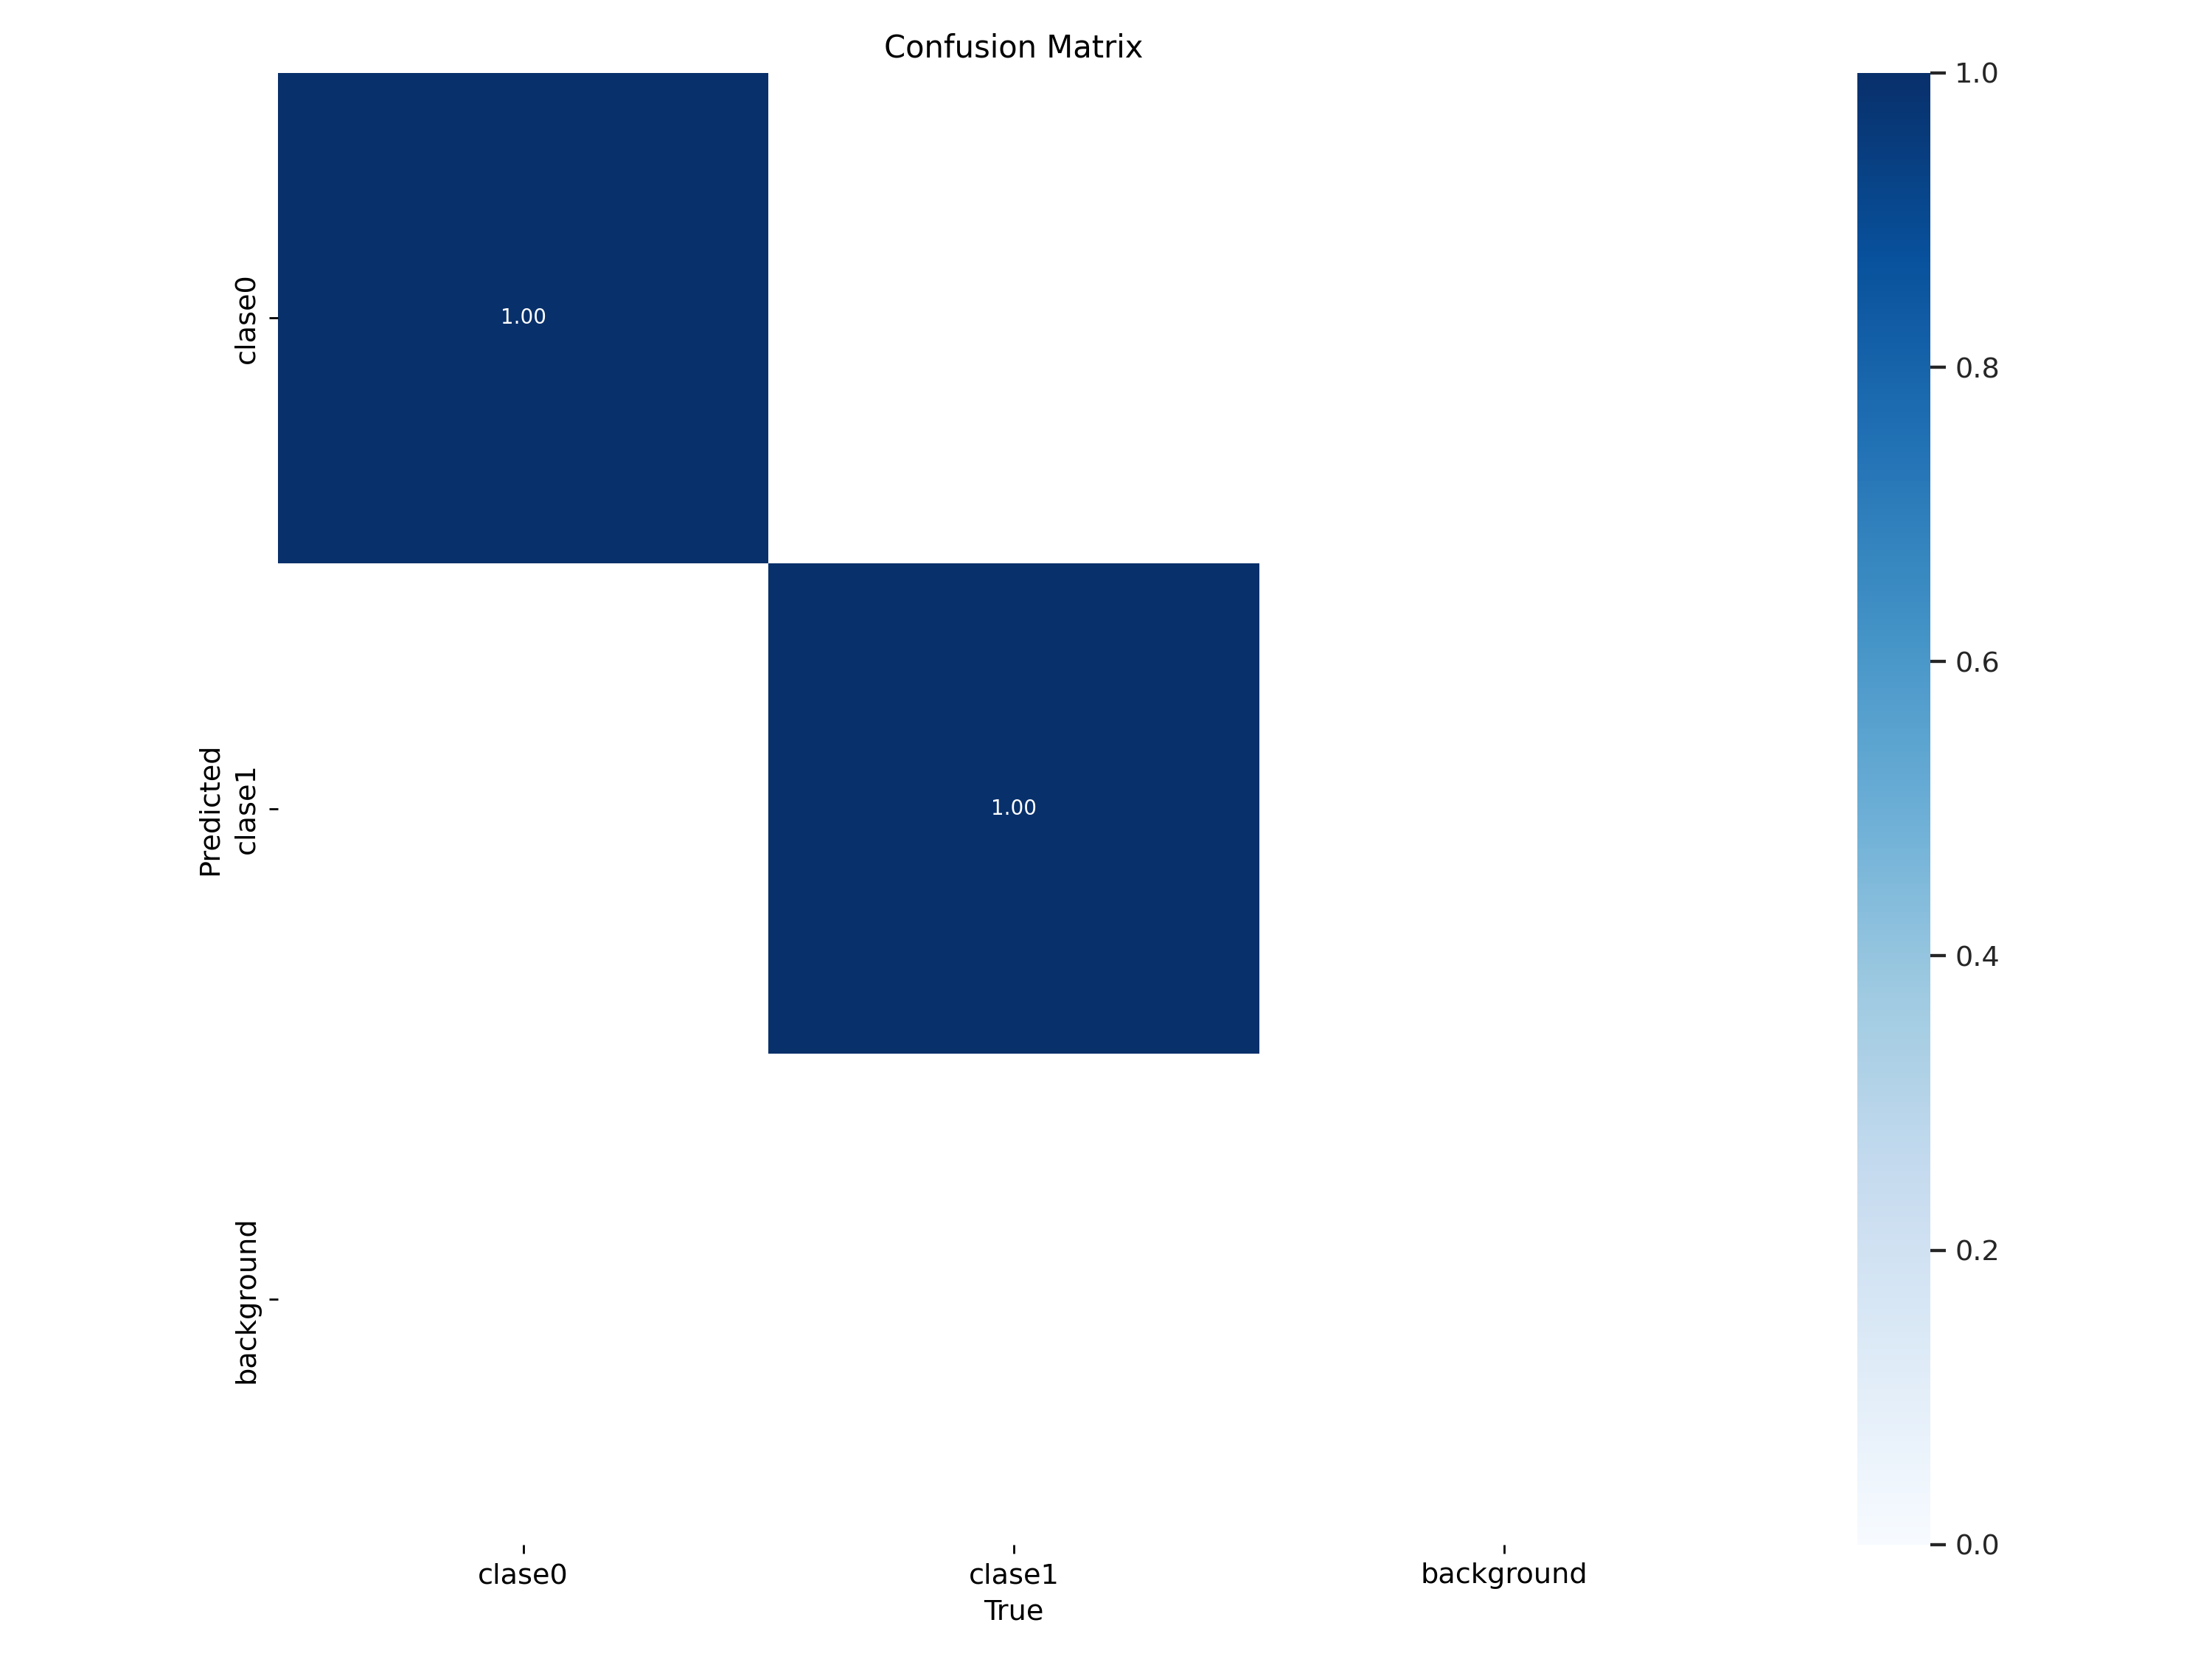

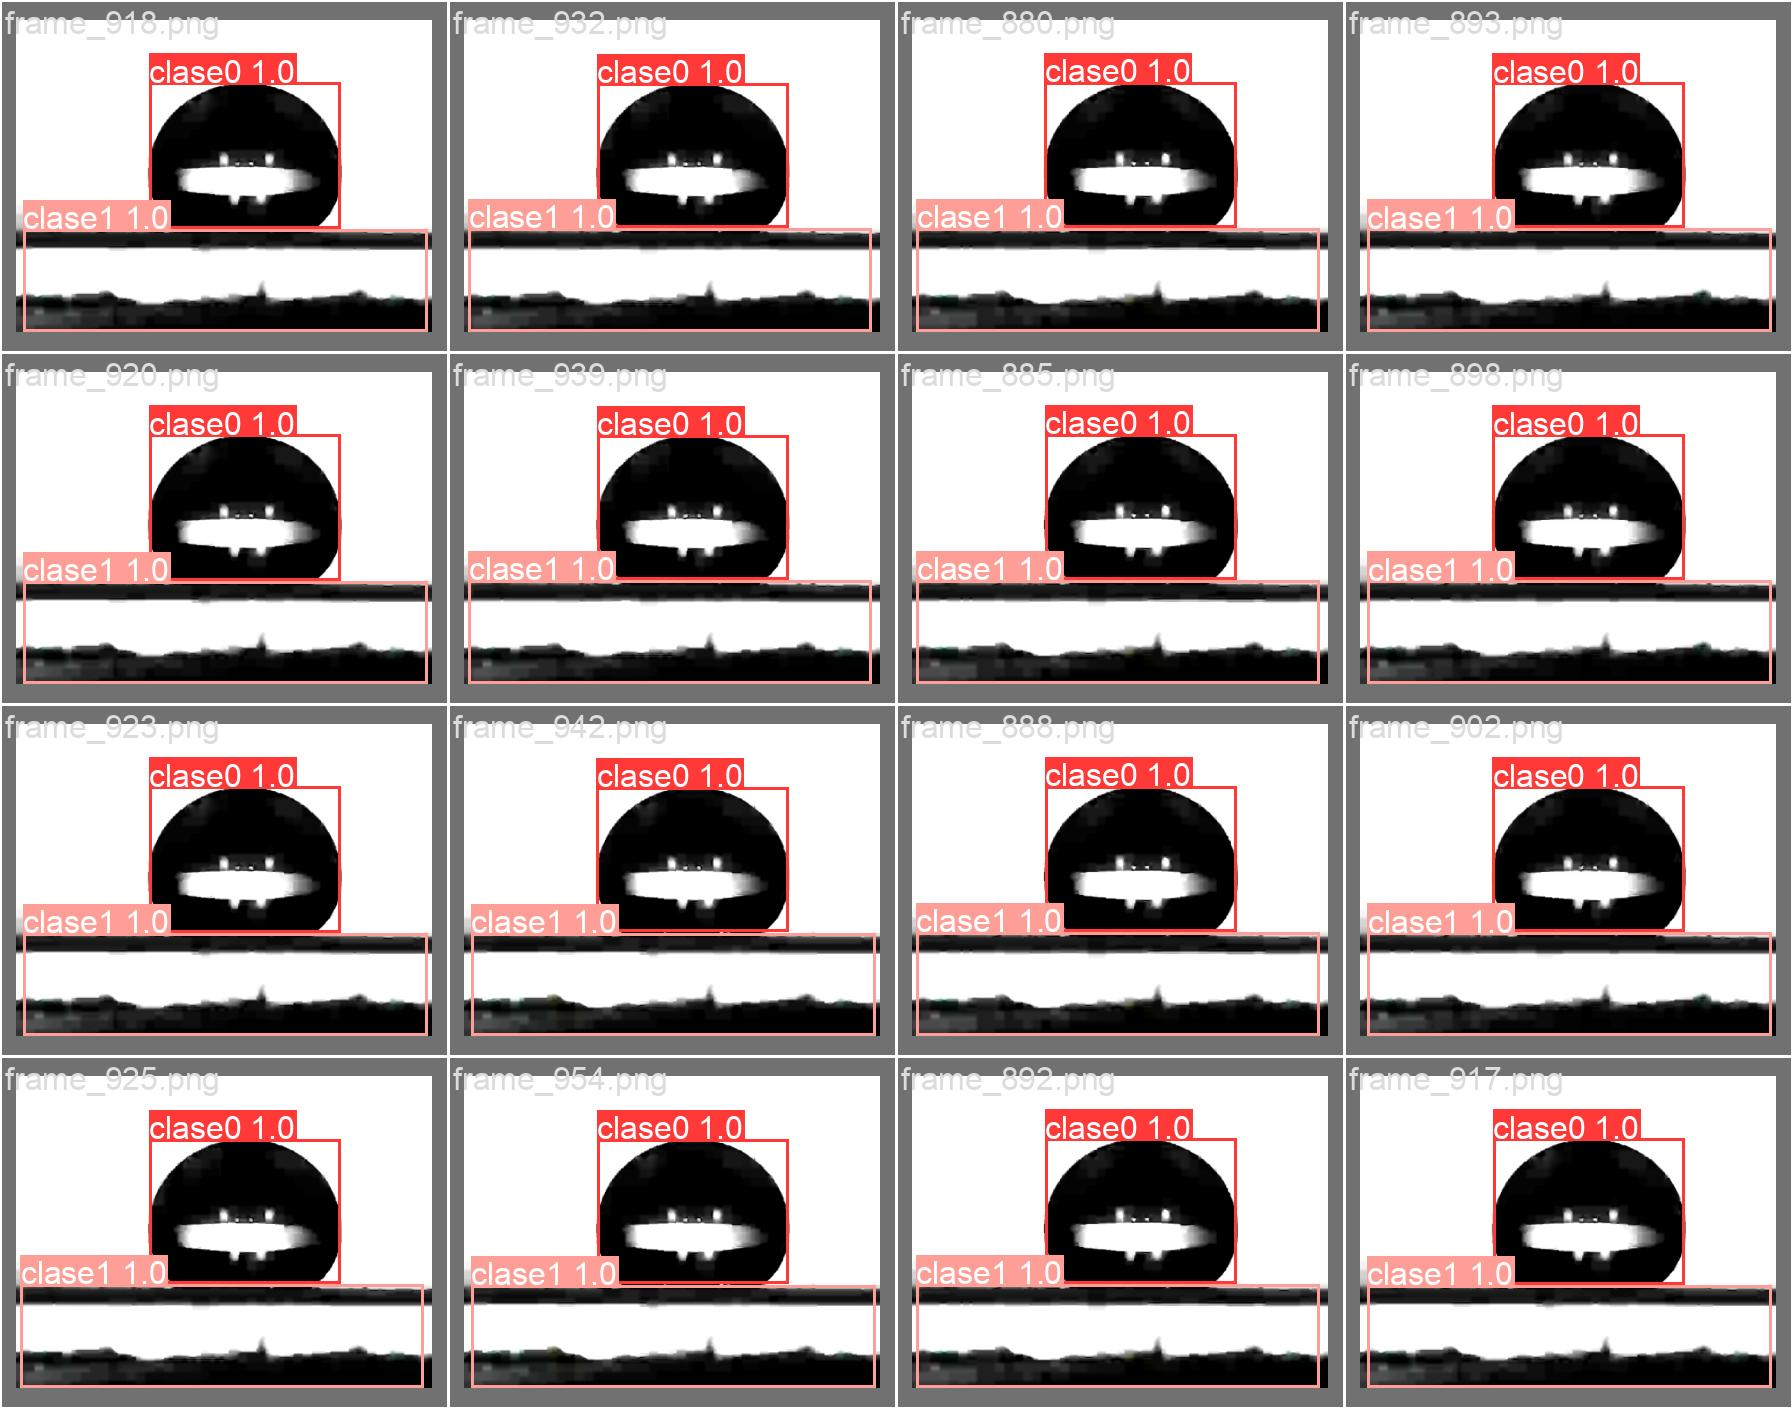

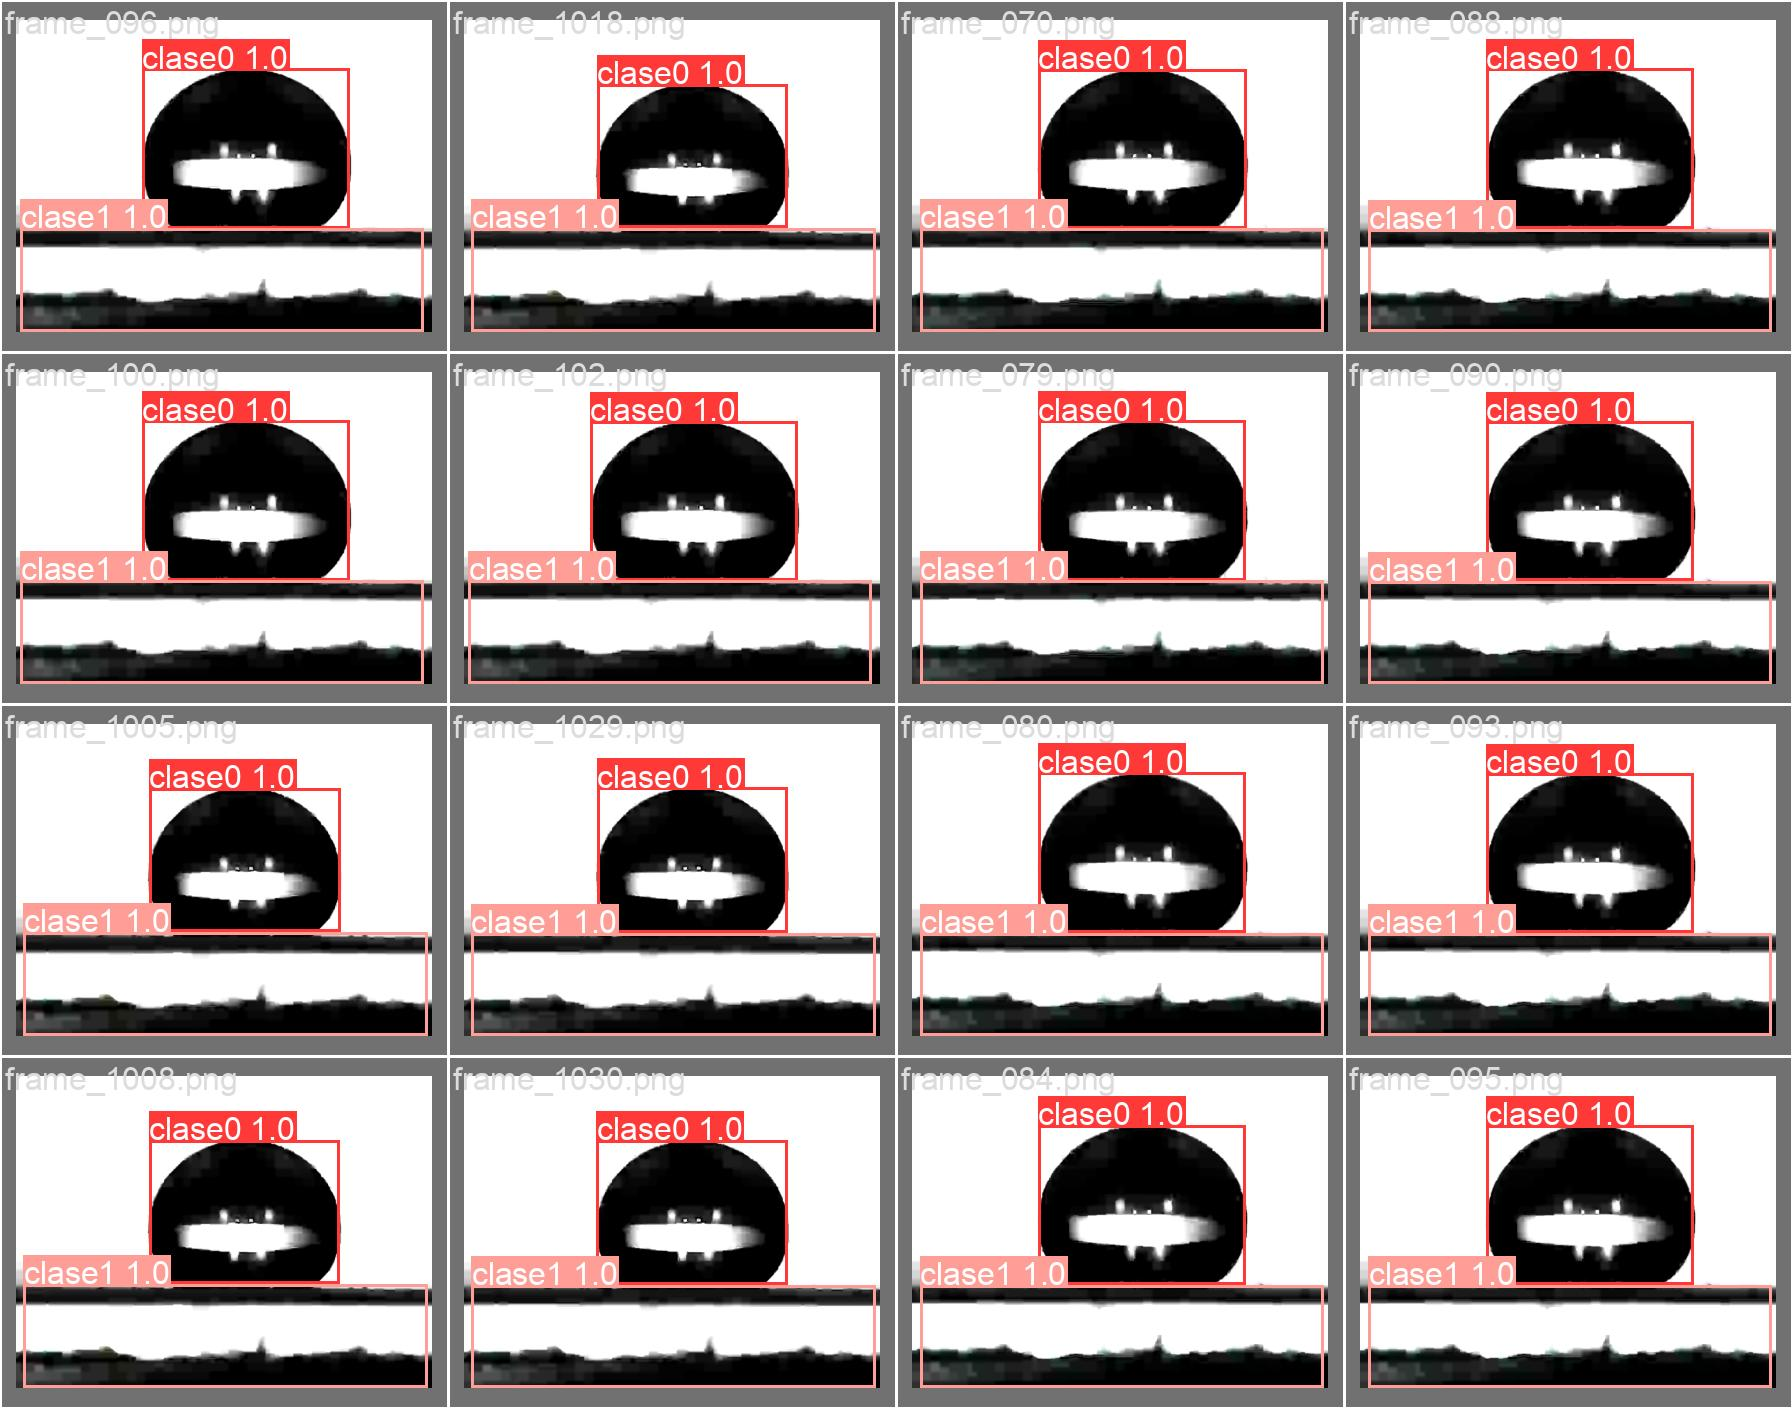

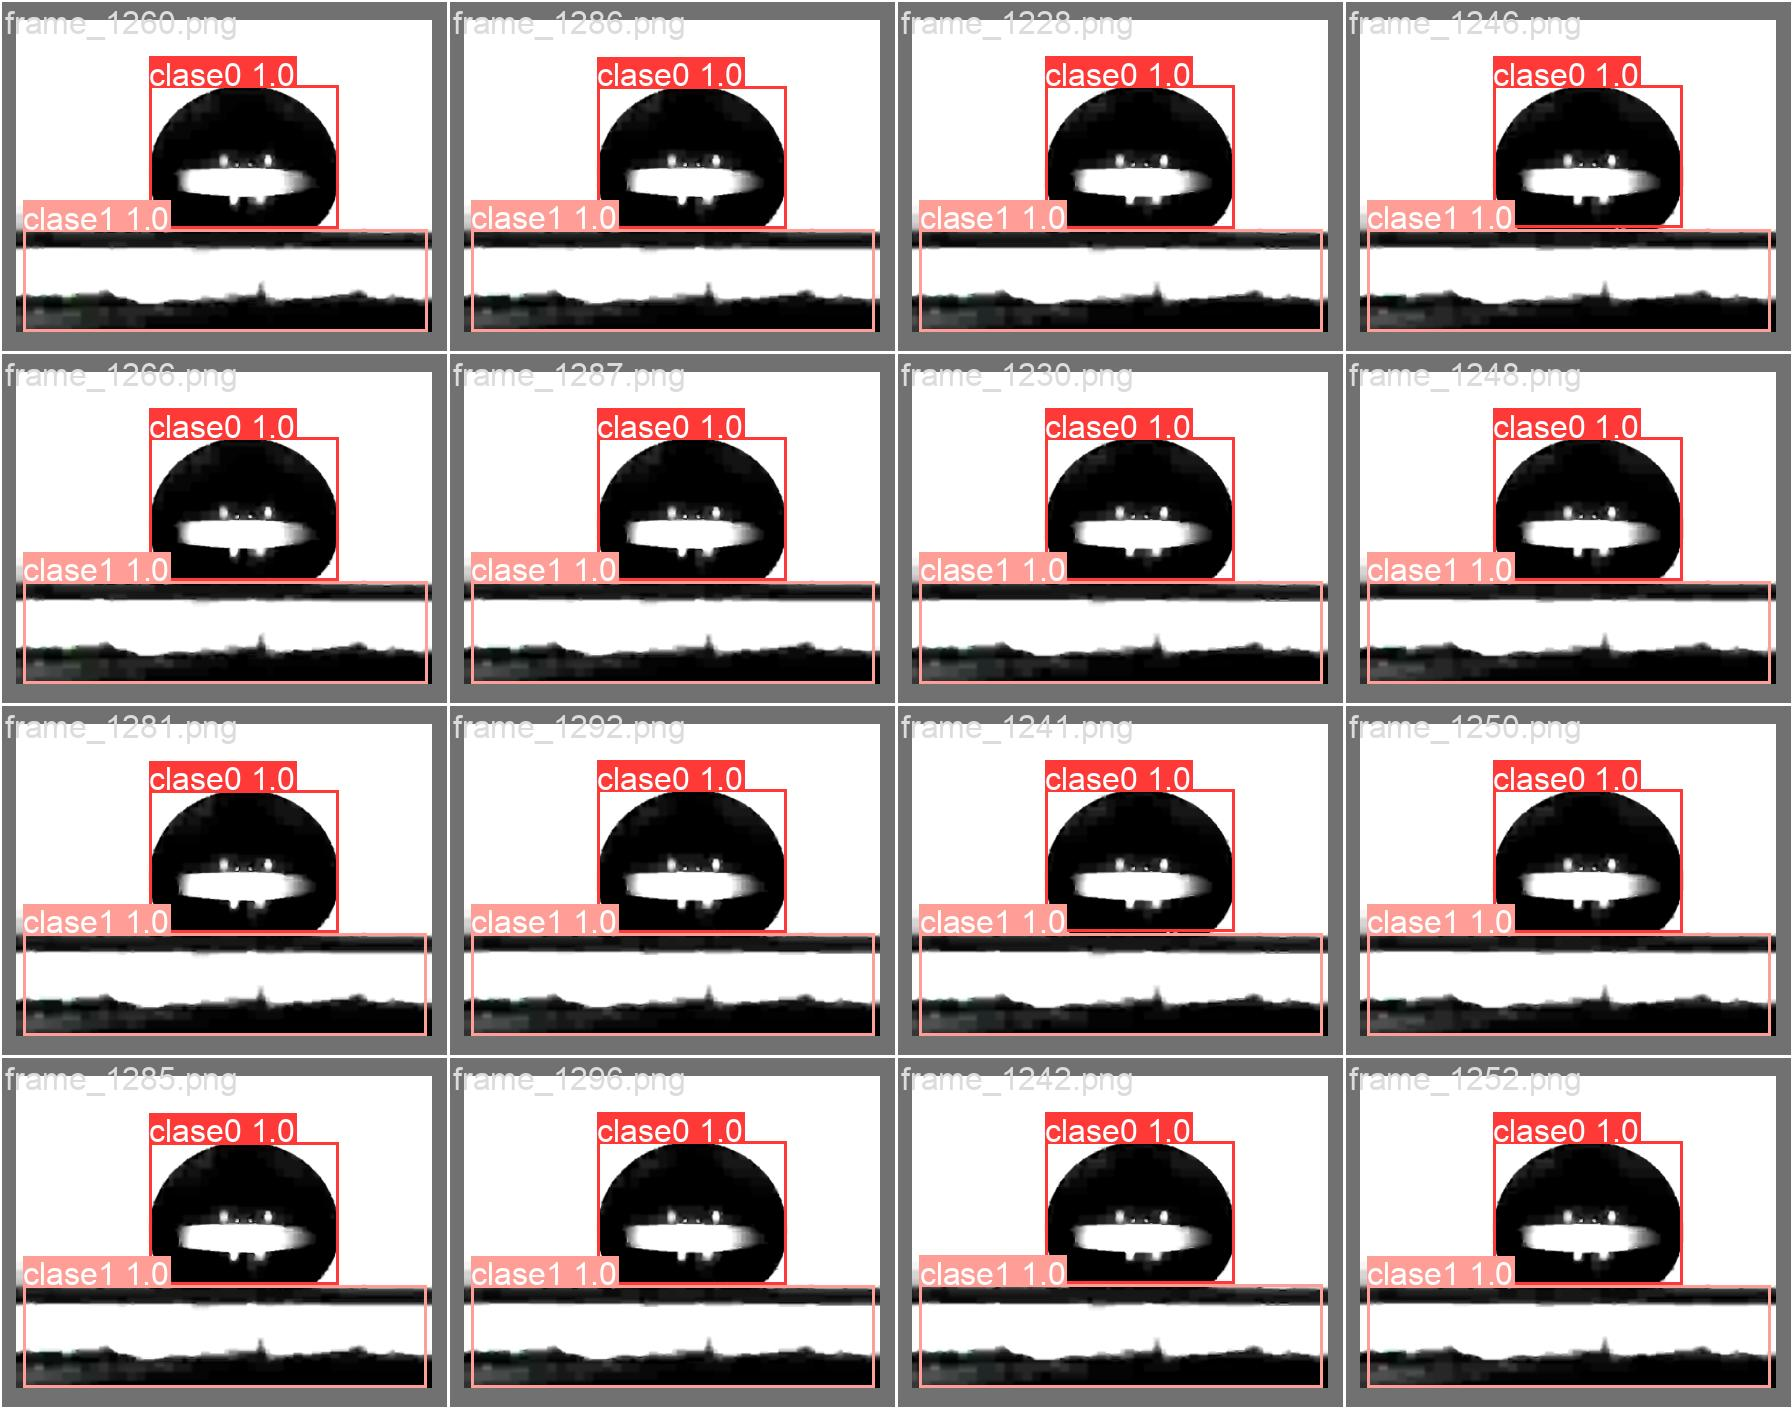

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.057927,0.029217,0.010881,0.47275,0.86948,0.78699,0.55905,0.031319,0.008087,0.000850,0.070120,0.003320,0.003320
1,1,0.037720,0.017948,0.002235,0.76569,0.99399,0.99495,0.70368,0.024479,0.006776,0.001072,0.039988,0.006522,0.006522
2,2,0.031901,0.014794,0.002143,0.99986,1.00000,0.99500,0.91523,0.013082,0.006697,0.001036,0.009725,0.009591,0.009591
3,3,0.024958,0.012737,0.001545,0.99993,1.00000,0.99500,0.97834,0.006926,0.004847,0.000804,0.009406,0.009406,0.009406
4,4,0.020686,0.011331,0.001203,0.99989,1.00000,0.99500,0.82457,0.010808,0.005021,0.000560,0.009406,0.009406,0.009406
5,5,0.018084,0.010605,0.000941,0.99970,1.00000,0.99500,0.93715,0.008019,0.004517,0.000418,0.009208,0.009208,0.009208
6,6,0.015963,0.009942,0.000803,0.99991,1.00000,0.99500,0.93817,0.008904,0.004652,0.000600,0.009010,0.009010,0.009010
7,7,0.014896,0.009314,0.000784,0.99993,1.00000,0.99500,0.94845,0.006239,0.004261,0.000444,0.008812,0.008812,0.008812
8,8,0.013928,0.008831,0.000721,0.99993,1.00000,0.99500,0.90949,0.010264,0.003813,0.000252,0.008614,0.008614,0.008614
9,9,0.012882,0.008399,0.000651,0.99993,1.00000,0.99500,0.96287,0.004139,0.002787,0.000441,0.008416,0.008416,0.008416


In [9]:
from IPython.display import Image, display
import pandas as pd

path = 'runs/train/gotas_yolo/'

display(Image(filename=path + 'results.png', width=1000))

display(Image(filename=path + 'PR_curve.png', width=600))
display(Image(filename=path + 'P_curve.png', width=600))
display(Image(filename=path + 'R_curve.png', width=600))
display(Image(filename=path + 'F1_curve.png', width=600))

display(Image(filename=path + 'confusion_matrix.png', width=600))

display(Image(filename=path + 'val_batch0_pred.jpg', width=700))
display(Image(filename=path + 'val_batch1_pred.jpg', width=700))
display(Image(filename=path + 'val_batch2_pred.jpg', width=700))

df = pd.read_csv(path + 'results.csv')
pd.set_option('display.max_rows', None)
display(df)


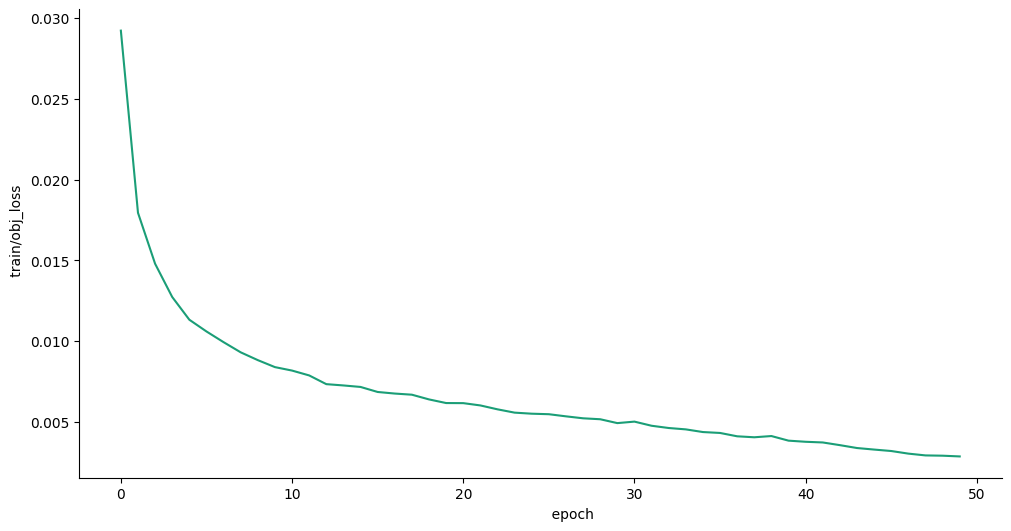

In [12]:
# @title                epoch vs       train/obj_loss

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['               epoch']
  ys = series['      train/obj_loss']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('               epoch', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('               epoch')
_ = plt.ylabel('      train/obj_loss')

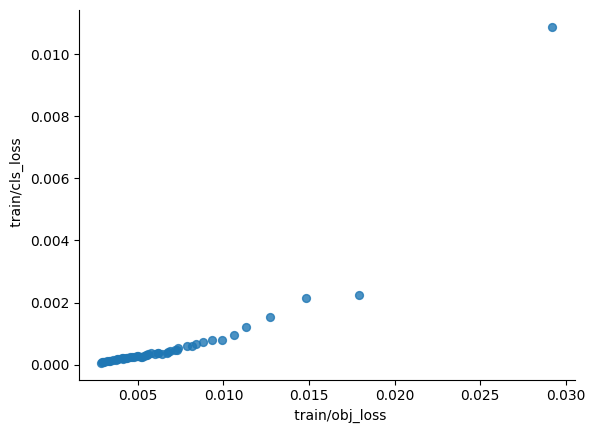

In [11]:
# @title       train/obj_loss vs       train/cls_loss

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='      train/obj_loss', y='      train/cls_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
!zip -r gotas_yolo.zip /content/yolov5/runs/train/gotas_yolo


  adding: content/yolov5/runs/train/gotas_yolo/ (stored 0%)
  adding: content/yolov5/runs/train/gotas_yolo/train_batch2.jpg (deflated 23%)
  adding: content/yolov5/runs/train/gotas_yolo/train_batch1.jpg (deflated 23%)
  adding: content/yolov5/runs/train/gotas_yolo/labels_correlogram.jpg (deflated 59%)
  adding: content/yolov5/runs/train/gotas_yolo/R_curve.png (deflated 23%)
  adding: content/yolov5/runs/train/gotas_yolo/val_batch1_labels.jpg (deflated 37%)
  adding: content/yolov5/runs/train/gotas_yolo/P_curve.png (deflated 25%)
  adding: content/yolov5/runs/train/gotas_yolo/val_batch0_pred.jpg (deflated 34%)
  adding: content/yolov5/runs/train/gotas_yolo/confusion_matrix.png (deflated 38%)
  adding: content/yolov5/runs/train/gotas_yolo/val_batch0_labels.jpg (deflated 37%)
  adding: content/yolov5/runs/train/gotas_yolo/results.csv (deflated 86%)
  adding: content/yolov5/runs/train/gotas_yolo/events.out.tfevents.1744063275.80d5f144f2ca.6965.0 (deflated 42%)
  adding: content/yolov5/runs

In [15]:
from google.colab import files
files.download("gotas_yolo.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>